In [67]:
%load_ext autoreload
%autoreload 2
from chromalab.printer import Printer, PrinterMapper
import numpy as np
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Printers are based on a mapping of the 6d ink coordinates to which printer/channel they're pringing out of,
# the function should take a 6-tuple, and return a list of N 4-tuples, where N is the number of prints you want.
# the order in each tuple is the CMYK channels of each printer (i.e. the 4th channel should always be a 0)
# for example, if I have a printer that prints Violet in the M channel, another that prints Turquoise, Red, and Citrus in the CMY channels,
# and a third printer that prints Blue and Maskara in the M and Y channels. Then to avoid accidental K printing I need to split up that
# second printer, so I can print the C (turquoise) and MY (Red,Citrus) seperately, and I can make functions like this:
def ExamplePrinterMap(c):
        return [(0,c[0],0,0),
                (c[1],0,0,0),
                (0,c[2],c[3],0),
                (0,c[4],c[5],0)]

examplePrinterNames = ["V","T","RC","BM"] # violet turquise red citrus blue maskara

# the printer names should be a list of length N, and correspond to the names of the .tif files that get created, so they should remind you which printer they are required for.
# here, T and RC come out of the same printer, but since the physical printer is labeled with these names I can still figure it out.
# examplePrinterNames = ["P2", "P1", "P1", "P3"] would also work, whatever makes more sense to you

In [6]:
#to make isochromatic dot test, do something like this
p = Printer() #the important thing is for the directory file to have your secretimages/ file in it

testDict = {
    "A": ([25,32,47,85],[37,90,2,50],'87'), #downstairs
    "B": ([27,2,57,85],[42,95,2,17],'85'),
    "C": ([30,22,50,90],[42,95,0,52],'73'),
    "D": ([30,25,47,90],[37,90,2,50],'27'), #2850k
    "E": ([27,15,52,82],[40,87,0,25],'39'),
    "F": ([30,7,52,95],[40,97,0,50],'68'),
    "G": ([30,17,50,92],[37,90,2,62],'96'), #4800k
    "H": ([30,17,50,92],[37,92,2,65],'72'),
    "I": ([32,17,50,80],[40,87,0,25],'35'),
    "J": ([30,17,50,92],[37,90,2,62],'67'), #6500k
    "K": ([30,22,50,90],[37,90,2,50],'64'),
    "L": ([27,7,55,85],[40,87,0,45],'89'),
}

for t in testDict.keys():
    inside,outside,secret = testDict[t]
    print(inside)
    inside = p.CIJKtoCMYIJK(p.div100(inside)) #if the printer values are out of 1, or are 6d, you can skip those steps
    outside = p.CIJKtoCMYIJK(p.div100(outside))
    p.generate_CC(inside,outside,0,secret,t,True)



[25, 32, 47, 85]
18
24
20
25
18
24
24
24
14
24
13
25
12
24
12
25
20
26
20
13
19
20
12
24
14
20
13
25
13
26
20
24
19
18
12
18
25
20
13
13
25
24
24
12
20
26
20
14
13
12
18
19
19
12
12
20
26
25
18
24
14
20
24
25
20
12
25
24
18
24
25
13
18
24
25
18
24
25
26
19
26
20
19
14
24
25
26
14
13
25
18
20
19
14
20
20
19
18
26
13
20
18
26
12
13
13
19
20
24
14
24
19
14
25
19
12
24
12
20
25
14
18
18
24
13
13
12
13
25
14
14
18
18
19
14
20
24
14
19
26
14
24
14
12
24
20
18
25
24
24
26
20
24
18
24
19
26
19
14
14
13
25
26
14
13
13
14
25
24
20
25
24
14
20
13
12
19
13
24
25
20
12
13
19
25
26
26
12
12
26
24
26
26
13
24
19
14
12
25
26
14
19
13
13
18
24
19
19
26
24
19
12
12
18
14
19
25
19
20
26
26
19
12
26
24
26
20
20
25
20
13
14
14
12
14
20
18
14
13
20
13
20
25
14
12
20
19
26
14
14
19
13
20
26
20
24
12
14
14
26
26
18
13
13
19
26
18
25
12
20
26
13
14
13
12
26
13
13
26
18
18
24
26
14
18
20
24
19
13
18
14
12
14
25
13
20
18
20
24
24
13
12
25
25
20
13
13
13
18
14
18
19
24
19
20
19
19
19
18
19
13
25
25
25
19
24
26
20

In [7]:
# to generate a dot list, do something like this
p = Printer(printerMap= Printer.SixInkPrinterMap, printerNames=Printer.sixInkPrinterNames)
l=[]
for c in range(2):
    for m in range(2):
        for y in range(2):
            for i in range(2):
                for j in range(2):
                    for k in range(2):
                        l += [[c,m,y,i,j,k]]
p.generateDotList(l) #this generates the NB primaries for 6 inks

[0, 0, 0, 0, 0, 0]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[0, 0, 0, 0, 0, 1]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 255, 0)]
[0, 0, 0, 0, 1, 0]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 255, 0, 0)]
[0, 0, 0, 0, 1, 1]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 255, 255, 0)]
[0, 0, 0, 1, 0, 0]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 255, 0), (0, 0, 0, 0)]
[0, 0, 0, 1, 0, 1]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 255, 0), (0, 0, 255, 0)]
[0, 0, 0, 1, 1, 0]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 255, 0), (0, 255, 0, 0)]
[0, 0, 0, 1, 1, 1]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 255, 0), (0, 255, 255, 0)]
[0, 0, 1, 0, 0, 0]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 255, 0, 0), (0, 0, 0, 0)]
[0, 0, 1, 0, 0, 1]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 255, 0, 0), (0, 0, 255, 0)]
[0, 0, 1, 0, 1, 0]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 255, 0, 0), (0, 255, 0, 0)]
[0, 0, 1, 0, 1, 1]
colors= [(0, 0, 0, 0), 

In [18]:
# def BackupPrinterMap(c):
#     return [(c[0],c[1],0,0),
#             (c[2],0,c[3],0),
#             (0,0,c[4],0)]
# backupPrinterNames = ["PV","TC","M"]

def BackupPrinterMap(c):
    return [(0,c[1],0,0),
            (c[2],0,c[3],0),
            (0,c[0],0,0),
            (0,0,c[4],0)]
backupPrinterNames = ["V","TC","R","M"]

p = Printer(printerMap=BackupPrinterMap, printerNames=backupPrinterNames)
l=[]
for c in range(2):
    for m in range(2):
        for y in range(2):
            for i in range(2):
                for j in range(2):
                    l += [[c,m,y,i,j]]
p.generateDotList(l,name="withLamy") #this generates the NB primaries for 6 inks

[0, 0, 0, 0, 0]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[0, 0, 0, 0, 1]
colors= [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 255, 0)]
[0, 0, 0, 1, 0]
colors= [(0, 0, 0, 0), (0, 0, 255, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[0, 0, 0, 1, 1]
colors= [(0, 0, 0, 0), (0, 0, 255, 0), (0, 0, 0, 0), (0, 0, 255, 0)]
[0, 0, 1, 0, 0]
colors= [(0, 0, 0, 0), (255, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[0, 0, 1, 0, 1]
colors= [(0, 0, 0, 0), (255, 0, 0, 0), (0, 0, 0, 0), (0, 0, 255, 0)]
[0, 0, 1, 1, 0]
colors= [(0, 0, 0, 0), (255, 0, 255, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[0, 0, 1, 1, 1]
colors= [(0, 0, 0, 0), (255, 0, 255, 0), (0, 0, 0, 0), (0, 0, 255, 0)]
[0, 1, 0, 0, 0]
colors= [(0, 255, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[0, 1, 0, 0, 1]
colors= [(0, 255, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 255, 0)]
[0, 1, 0, 1, 0]
colors= [(0, 255, 0, 0), (0, 0, 255, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[0, 1, 0, 1, 1]
colors= [(0, 255, 0, 0), (0, 0, 255, 0), (0, 0, 0, 0), (0, 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
%load_ext autoreload
%autoreload 2
file_path = "/Users/frackfrick/Desktop/SchoolStuff/compColor/25lamy_percentages.npy"
index_path = "/Users/frackfrick/Desktop/SchoolStuff/Research/9x9_idx_into_cubemap.npy"
data = np.load(file_path)
index = np.load(index_path)
def BackupPrinterMap(c):
    return [(0,c[1],0,0),
            (c[2],0,c[3],0),
            (0,c[0],0,0),
            (0,0,c[4],0)]
backupPrinterNames = ["V","TC","R","M"]

p = Printer(printerMap=BackupPrinterMap, printerNames=backupPrinterNames)

# p.new5x5Grid(index,data,"5x5")
# p.new5x5Grid(index,data,"5x5Rect",True)

swaps = []
for i in range(81):
    if random.random() < 0.15:
        swaps += [i]
p.new9x9Shuffle(index,data,swaps,"swaps")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing NAN
printing swaps/0


In [71]:
dotSize = 55
r = dotSize/2
border = 5
size = 1024
printerMapper = PrinterMapper(BackupPrinterMap,(int(size*1.3), size),backupPrinterNames,p.outDir)
c = [np.nan]
x = 20
for i in range(110,150,5):
    printerMapper.DrawRect((x,50,x+i,50+i),c)
    x += i + 5
printerMapper.ExportImages("testSquares","0")

printing testSquares/0


[[0.0, 0.0, 0.0], [0.0, 0.0, 0.25], [0.0, 0.0, 0.5], [0.0, 0.0, 0.75], [0.0, 0.0, 1.0], [0.0, 0.25, 0.0], [0.0, 0.25, 0.25], [0.0, 0.25, 0.5], [0.0, 0.25, 0.75], [0.0, 0.25, 1.0], [0.0, 0.5, 0.0], [0.0, 0.5, 0.25], [0.0, 0.5, 0.5], [0.0, 0.5, 0.75], [0.0, 0.5, 1.0], [0.0, 0.75, 0.0], [0.0, 0.75, 0.25], [0.0, 0.75, 0.5], [0.0, 0.75, 0.75], [0.0, 0.75, 1.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.25], [0.0, 1.0, 0.5], [0.0, 1.0, 0.75], [0.0, 1.0, 1.0], [0.25, 0.0, 0.0], [0.25, 0.0, 0.25], [0.25, 0.0, 0.5], [0.25, 0.0, 0.75], [0.25, 0.0, 1.0], [0.25, 0.25, 0.0], [0.25, 0.25, 0.25], [0.25, 0.25, 0.5], [0.25, 0.25, 0.75], [0.25, 0.25, 1.0], [0.25, 0.5, 0.0], [0.25, 0.5, 0.25], [0.25, 0.5, 0.5], [0.25, 0.5, 0.75], [0.25, 0.5, 1.0], [0.25, 0.75, 0.0], [0.25, 0.75, 0.25], [0.25, 0.75, 0.5], [0.25, 0.75, 0.75], [0.25, 0.75, 1.0], [0.25, 1.0, 0.0], [0.25, 1.0, 0.25], [0.25, 1.0, 0.5], [0.25, 1.0, 0.75], [0.25, 1.0, 1.0], [0.5, 0.0, 0.0], [0.5, 0.0, 0.25], [0.5, 0.0, 0.5], [0.5, 0.0, 0.75], [0.5, 0.0, 1.0

TypeError: Axes3D.scatter() missing 1 required positional argument: 'ys'

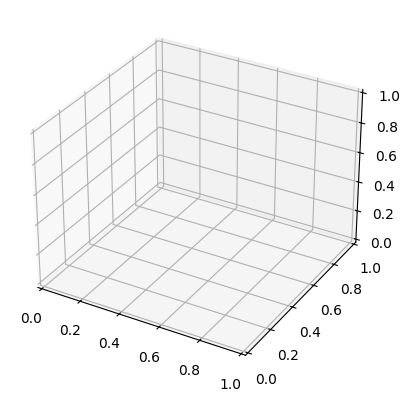

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
res = 5
points = []
for i in range(res):
    for j in range(res):
        for k in range(res):
            if i != 0 or i != res or j != 0 or j != res or k != 0 or k != res:
                points += [[i/(res-1),j/(res-1),k/(res-1)]]
print(points)
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(points, c='r', marker='o')

# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

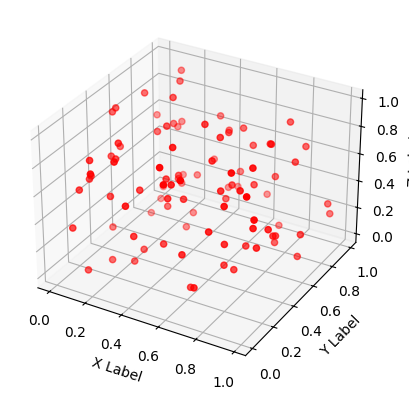

In [75]:

import numpy as np

# Generate some example 3D data
np.random.seed(42)  # For reproducibility
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x, y, z, c='r', marker='o')

# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()
